# GFR Data Generation
### _Computer Age Statistical Inference_ (CASI) Study Group
#### Author: Jim Chen

Import necessary libraries.

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import sem

Set up to simulate sample of the distribution of GFR function.

In [7]:
# Assign vector of frequency in distribution.
x = [1, 3, 5, 9, 8, 14, 16, 20, 31, 22, 21, 10, 17, 3, 13, 1, 3, 1, 3, 3, 1, 2, 0, 0, 1, 0, 1, 2]

In [8]:
np.random.seed(0)

Simulate sample of distribution

In [9]:
histStart = 100 - 25*3 + 1.5
gfrdata = []
for i, histCount in enumerate(x):
    for j in range(histCount):
        gfrdata.append(np.random.uniform(histStart-1.5+i*3, histStart+1.5+i*3))

Display the mean of the sample, and the standard error of the mean.
In frequentist statistics, the standard error of the mean gives us a range of likely values of the mean based on the sample.
As noted in CASI Ch. 2, "the frequentest principle [is] to attribute for $\hat\theta$ the accuracy properties of the ensemble of $\hat\Theta$ values (Efron and Hastie 14).

In [11]:
np.mean(gfrdata), sem(gfrdata)

(53.881066282912002, 0.95202165832846308)

Plot the distribution of the simulated sample.

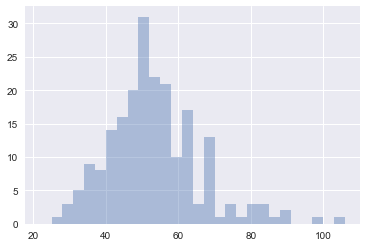

In [12]:
sb.distplot(gfrdata, kde=False, bins=range(22, 109, 3))

### MLE for GFR Data

Let's use MLE to find the MLE of $\mu, \sigma$ for a Normal distribution based on the sample.

Follow https://lectures.quantecon.org/py/mle.html

Plot the pdf for different values of $\mu$, $\sigma$ fixed at $\sigma = 5$ just to simplify things for now.

In [19]:
import math as m

normal_pdf = lambda x, mu, sigma: 1/(m.sqrt(2*m.pi*sigma**2))*m.e**((-1/2)*((x-mu)/sigma)**2)

Plot the likelihood function evaluated for different values of $\mu, \sigma.$ 

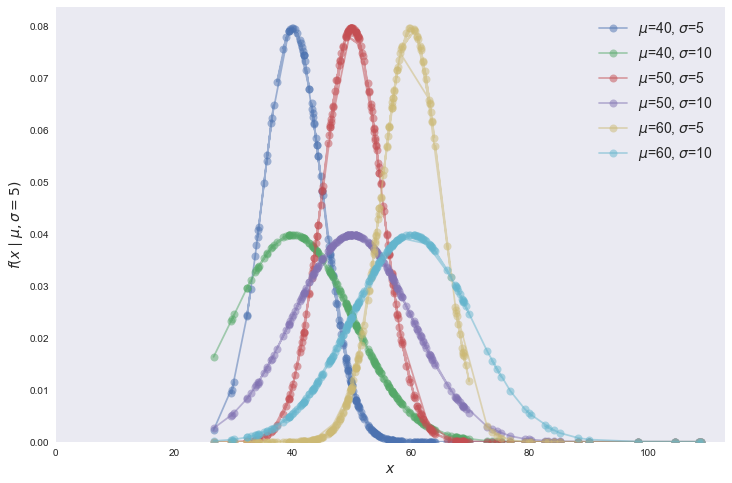

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

for mu in [40, 50, 60]:
    for sigma in [5, 10]:
        distribution = []
        for x_i in gfrdata:
            distribution.append(normal_pdf(x_i, mu, sigma))
        ax.plot(gfrdata,
                distribution,
                label=('$\mu$=' + str(mu) + ', $\sigma$=' + str(sigma)),
                alpha = 0.5,
                marker = 'o',
                markersize = 8)
        

ax.grid()
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$f(x \mid \mu, \sigma = 5)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

After http://www.statsmodels.org/0.6.1/examples/notebooks/generated/generic_mle.html

Plot the log likelihood function evaluated for different values of $\mu, \sigma.$ We will be choosing the $\mu, \sigma$ that maximizes the log-likelihood of $x$.

In [75]:
import statsmodels.api as sm
from scipy import stats

In [85]:
def loglikenorm(dat, mu, sigma):
    return stats.norm.logpdf(dat, mu, sigma)

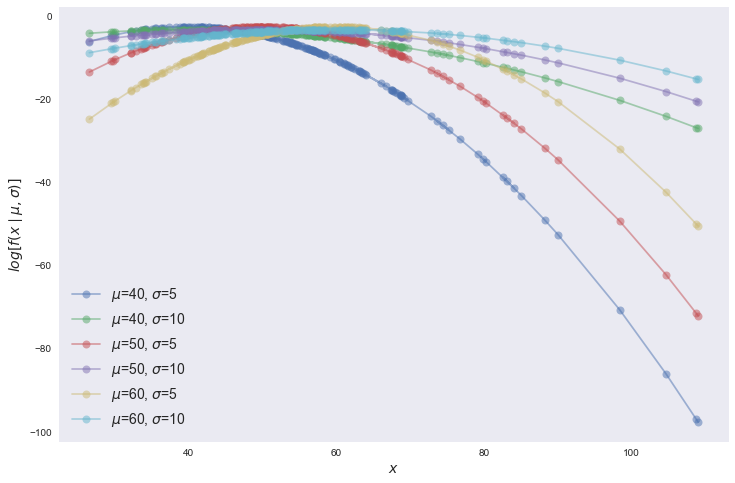

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))

ll = []

for mu in [40, 50, 60]:
    for sigma in [5, 10]:
        ax.plot(gfrdata,
                loglikenorm(gfrdata, mu, sigma),
                label=('$\mu$=' + str(mu) + ', $\sigma$=' + str(sigma)),
                alpha = 0.5,
                marker = 'o',
                markersize = 8)
        

ax.grid()
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$log[f(x \mid \mu, \sigma)]$', fontsize=14)
#ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)     

### Maximum likelihood estimate

The Scipy package ```stats``` has a normal random variable object ```norm``` with method ```.fit()``` that returns estimates for $\mu, \sigma$ given data.

In [106]:
muhat, sigmahat = stats.norm.fit(gfrdata)

In [102]:
muhat, sigmahat

(53.881066282912002, 13.796104521369797)

For the normal distribution, it happens to be that the MLE for $\mu$ is $\hat\mu$ and the MLE for $\sigma$ is $\sqrt\frac{(X - \bar X)^2}{N-1}$.

If you want to follow